Consistency Score All-Rounder Score = (Batting Consistency Score + Bowling Consistency Score) 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def analyze_and_visualize(df):
    # Define features for analysis.
    features = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'HS', 'Bat_Ave', 'BF', 'Bat_SR', 
                "100's", "50's", "Zeros", '4s', '6s', 'Bowl_Mat', 'Bowl_Inns', 'Overs', 'Mdns', 'Bowl_Runs', 
                'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
    
    # Check if all features exist in the DataFrame
    missing_features = [col for col in features if col not in df.columns]
    if missing_features:
        raise ValueError(f"The following required columns are missing in the DataFrame: {missing_features}")
    
    # Select features from the DataFrame
    df_analysis = df[features]
    
    # Replace infinities and NaN values with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis

In [5]:

def calculate_allrounder_formula_components(df):
    """
    Calculates the components of the All-Rounder Consistency Score formula.
    
    Consistency Score All-Rounder Score = (Batting Consistency Score + Bowling Consistency Score) / 2 
    """
    df_components = df.copy()
    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Bat_Mat'] = pd.to_numeric(df_components['Bat_Mat'], errors='coerce')
    df_components['Bat_Inns'] = pd.to_numeric(df_components['Bat_Inns'], errors='coerce')
    df_components['NO'] = pd.to_numeric(df_components['NO'], errors='coerce')
    df_components['Bat_Runs'] = pd.to_numeric(df_components['Bat_Runs'], errors='coerce')
    df_components['BF'] = pd.to_numeric(df_components['BF'], errors='coerce')
    df_components['Bat_Ave'] = pd.to_numeric(df_components['Bat_Ave'], errors='coerce')
    df_components["100's"] = pd.to_numeric(df_components["100's"], errors='coerce')
    df_components["50's"] = pd.to_numeric(df_components["50's"], errors='coerce')
    df_components["Zeros"] = pd.to_numeric(df_components["Zeros"], errors='coerce')
    df_components['Bowl_Inns'] = pd.to_numeric(df_components['Bowl_Inns'], errors='coerce')
    df_components['Bowl_Mat'] = pd.to_numeric(df_components['Bowl_Mat'], errors='coerce')
    df_components['Overs'] = pd.to_numeric(df_components['Overs'], errors='coerce')
    df_components['Wkts'] = pd.to_numeric(df_components['Wkts'], errors='coerce')
    df_components['Bowl_Ave'] = pd.to_numeric(df_components['Bowl_Ave'], errors='coerce')
    df_components['Econ'] = pd.to_numeric(df_components['Econ'], errors='coerce')
    df_components['Bowl_SR'] = pd.to_numeric(df_components['Bowl_SR'], errors='coerce')
    df_components['4W'] = pd.to_numeric(df_components['4W'], errors='coerce')
    df_components['5W'] = pd.to_numeric(df_components['5W'], errors='coerce')
    df_components['Mdns'] = pd.to_numeric(df_components['Mdns'], errors='coerce')

    
    

    # Perform calculations, ensure float division and handle potential NaN values
    df_components['Inns_per_Mat_Bat'] = df_components['Bat_Inns'].astype(float) / df_components['Bat_Mat'].astype(float)
    df_components['NO_per_Inns'] = df_components['NO'].astype(float) / df_components['Bat_Inns'].astype(float)
    df_components['Runs_per_BF'] = df_components['Bat_Runs'].astype(float) / df_components['BF'].astype(float)
    df_components['Ave_Score_Bat'] = df_components['Bat_Ave'].astype(float)  # Direct Ave
    df_components['50s100s_per_Inns'] = (df_components["50's"].astype(float) + 2 * df_components["100's"].astype(float)) / df_components['Bat_Inns'].astype(float)
    df_components['Zeros_per_Inns'] = df_components["Zeros"].astype(float) / df_components['Bat_Inns'].astype(float)
    df_components['Inns_per_Mat_bowl'] = df_components['Bowl_Inns'].astype(float) / df_components['Bowl_Mat'].astype(float) # Ensure float division
    df_components['Overs_per_Inns'] = df_components['Overs'].astype(float) / df_components['Bowl_Inns'].astype(float)
    df_components['Wkts_per_Overs'] = df_components['Wkts'].astype(float) / df_components['Overs'].astype(float)
    df_components['Ave_Score_Bowl'] = df_components['Bowl_Ave'].astype(float)  # Direct Ave
    df_components['Econ_Rate'] = df_components['Econ'].astype(float)  # Direct Econ
    df_components['SR_per_100'] = df_components['Bowl_SR'].astype(float) / 100
    df_components['4W5W_per_Inns'] = (df_components['4W'].astype(float) + 1.25 * df_components['5W'].astype(float)) / df_components['Bowl_Inns'].astype(float)
    df_components['Mdns_per_Overs'] = df_components['Mdns'].astype(float) / df_components['Overs'].astype(float)

    return df_components


In [6]:
data = pd.read_excel("../../all season cleaned data/allrounderset_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")

Data types of your columns before calculation:


In [7]:
numeric_cols = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'BF', 'Bat_Ave', "100's", "50's", "Zeros", 'Bowl_Inns', 'Bowl_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W', 'Mdns']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes) # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Bat_Inns', 'Bowl_Inns', 'Bat_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W','Mdns']
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum()) # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any') # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned)) # Print length of df_cleaned


# Calculate bowler formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_allrounder_formula_components(df_cleaned) # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr() # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Bowler Consistency Formula Components (after NaN removal):")
print(correlation_matrix)


Data types of your columns AFTER explicit numeric conversion:
Player            object
Span              object
Catches Taken      int64
Bat_Mat            int64
Bat_Inns         float64
NO               float64
Bat_Runs         float64
HS                object
Bat_Ave          float64
BF               float64
Bat_SR            object
100's            float64
50's             float64
Zeros            float64
4s                object
6s                object
Bowl_Mat           int64
Bowl_Inns        float64
Overs            float64
Mdns             float64
Bowl_Runs         object
Wkts             float64
Bowl_Ave         float64
Econ             float64
Bowl_SR          float64
4W               float64
5W               float64
dtype: object

Number of NaN values BEFORE removing:
Bat_Inns      1
Bowl_Inns     6
Bat_Mat       0
Overs         6
Wkts          6
Bowl_Ave     11
Econ          6
Bowl_SR      11
4W            6
5W            6
Mdns          6
dtype: int64

Number of rows BEFO

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_allrounder_consistency_components(df_components):
    features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'
    ]
    df_analysis = df_components[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)  # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Allrounder Consistency Formula Components')
    plt.show()

    return df_analysis


                   Inns_per_Mat_Bat  NO_per_Inns  Runs_per_BF  Ave_Score_Bat  \
Inns_per_Mat_Bat           1.000000    -0.525949     0.471150       0.727629   
NO_per_Inns               -0.525949     1.000000    -0.295920      -0.322878   
Runs_per_BF                0.471150    -0.295920     1.000000       0.575296   
Ave_Score_Bat              0.727629    -0.322878     0.575296       1.000000   
50s100s_per_Inns           0.630162    -0.444781     0.414610       0.696330   
Zeros_per_Inns            -0.209706    -0.107917    -0.326624      -0.489687   
Inns_per_Mat_bowl         -0.570878     0.310852    -0.351065      -0.592971   
Overs_per_Inns            -0.592351     0.428168    -0.361796      -0.554045   
Wkts_per_Overs            -0.067074     0.059116     0.287861       0.108914   
Ave_Score_Bowl             0.075920    -0.009668    -0.143808      -0.007974   
Econ_Rate                  0.204382    -0.021944     0.251692       0.129453   
SR_per_100                -0.007218    -

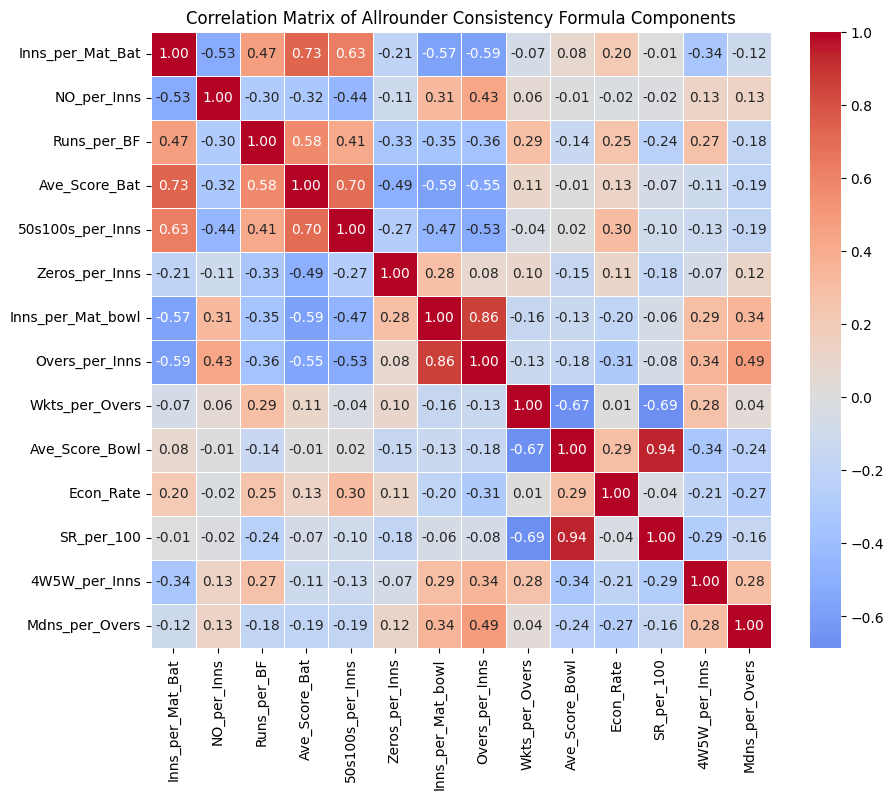

In [9]:
analyzed_df = analyze_allrounder_consistency_components(calculations_with_data)


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.optimize as opt

# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# Extract PC1 loadings and normalize
pc1_loadings = loadings['PC1']
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

# AHP Pairwise Comparison Matrix (example values)
pairwise_matrix = np.array([
    [1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11,   12,   13,   14],
    [1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11,   12,   13],
    [1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11,   12],
    [1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11],
    [1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10],
    [1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9],
    [1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8],
    [1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7],
    [1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6],
    [1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5],
    [1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4],
    [1/12, 1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3],
    [1/13, 1/12, 1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2],
    [1/14, 1/13, 1/12, 1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1]
])


# Calculate AHP weights
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
ahp_weights = ahp_weights / ahp_weights.sum()

ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

# Optimization-Based Approach
def consistency_score(weights, df):
    return np.dot(df[features].values, weights)

def objective(weights, df):
    scores = consistency_score(weights, df)
    return -np.var(scores)

initial_weights = np.ones(len(features)) / len(features)
bounds = [(0, 1)] * len(features)

result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()

optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                        PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat_Bat  -0.386959 -0.023340 -0.041973 -0.316171  0.042417  0.199704   
NO_per_Inns        0.250876  0.026845 -0.119496  0.554005 -0.117879  0.493832   
Runs_per_BF       -0.276358 -0.253572 -0.224575  0.181143  0.340135 -0.265843   
Ave_Score_Bat     -0.387327 -0.115236 -0.266644 -0.023908 -0.050155  0.186993   
50s100s_per_Inns  -0.360358 -0.070527 -0.084067 -0.163402  0.227004  0.193572   
Zeros_per_Inns     0.163874 -0.029317  0.627158 -0.292174  0.201392 -0.162705   
Inns_per_Mat_bowl  0.379686  0.003257 -0.086080 -0.126119  0.349401  0.023756   
Overs_per_Inns     0.396047 -0.024043 -0.250776 -0.090819  0.212726  0.169423   
Wkts_per_Overs    -0.010344 -0.473630  0.197554  0.249871 -0.195285 -0.036935   
Ave_Score_Bowl    -0.087623  0.538067 -0.087252  0.122376  0.188465 -0.092243   
Econ_Rate         -0.170389  0.067899  0.343948  0.35146

In [11]:
import pandas as pd

# Full list of all-rounder metrics
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

# Original AHP weights from expert pairwise comparisons for all-rounder metrics (example values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat_Bat': 0.247629,
    'NO_per_Inns': 0.190306,
    'Runs_per_BF': 0.144609,
    'Ave_Score_Bat': 0.109142,
    '50s100s_per_Inns': 0.081977,
    'Zeros_per_Inns': 0.061347,
    'Inns_per_Mat_bowl': 0.045783,
    'Overs_per_Inns': 0.034113,
    'Wkts_per_Overs': 0.025418,
    'Ave_Score_Bowl': 0.018989,
    'Econ_Rate': 0.014287,
    'SR_per_100': 0.010904,
    '4W5W_per_Inns': 0.008536,
    'Mdns_per_Overs': 0.006960
})

# Original PCA weights derived from PC1 loadings for all-rounder metrics (example values)
pca_weights = pd.Series({
    'Inns_per_Mat_Bat': 0.118813,
    'NO_per_Inns': 0.077030,
    'Runs_per_BF': 0.084854,
    'Ave_Score_Bat': 0.118926,
    '50s100s_per_Inns': 0.110646,
    'Zeros_per_Inns': 0.050317,
    'Inns_per_Mat_bowl': 0.116580,
    'Overs_per_Inns': 0.121604,
    'Wkts_per_Overs': 0.003176,
    'Ave_Score_Bowl': 0.026904,
    'Econ_Rate': 0.052317,
    'SR_per_100': 0.008858,
    '4W5W_per_Inns': 0.046838,
    'Mdns_per_Overs': 0.063135
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors for specific all-rounder metrics (update boost factors as needed)
boost_factors = {
    'Inns_per_Mat_Bat': 1.0,
    'NO_per_Inns': 1.0,
    'Runs_per_BF': 2.0,
    'Ave_Score_Bat': 2.0,
    '50s100s_per_Inns': 2.0,
    'Zeros_per_Inns': 1.0,
    'Inns_per_Mat_bowl': 1.0,
    'Overs_per_Inns': 1.0,
    'Wkts_per_Overs': 1.0,
    'Ave_Score_Bowl': 1.0,
    'Econ_Rate': 1.0,
    'SR_per_100': 1.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors
hybrid_weights_boosted = hybrid_weights * pd.Series(boost_factors)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted /= hybrid_weights_boosted.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights = hybrid_weights_boosted.sum()

# Output results
print(hybrid_weights_boosted)
print("Sum of weights:", sum_of_weights)


Inns_per_Mat_Bat     0.157209
NO_per_Inns          0.117595
Runs_per_BF          0.190595
Ave_Score_Bat        0.168621
50s100s_per_Inns     0.136275
Zeros_per_Inns       0.043659
Inns_per_Mat_bowl    0.050418
Overs_per_Inns       0.045406
Wkts_per_Overs       0.014101
Ave_Score_Bowl       0.016071
Econ_Rate            0.019330
SR_per_100           0.007741
4W5W_per_Inns        0.015065
Mdns_per_Overs       0.017913
dtype: float64
Sum of weights: 1.0


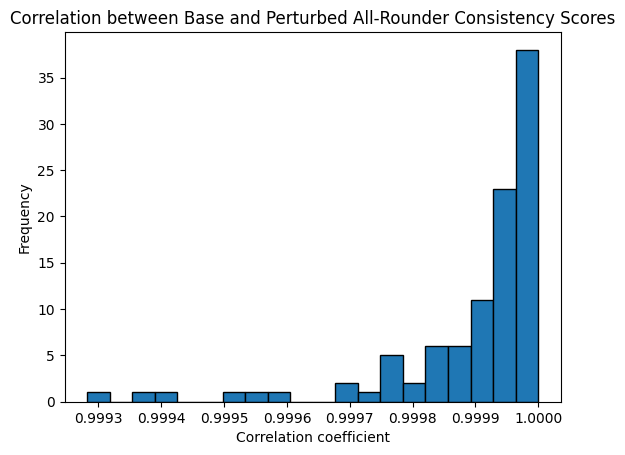

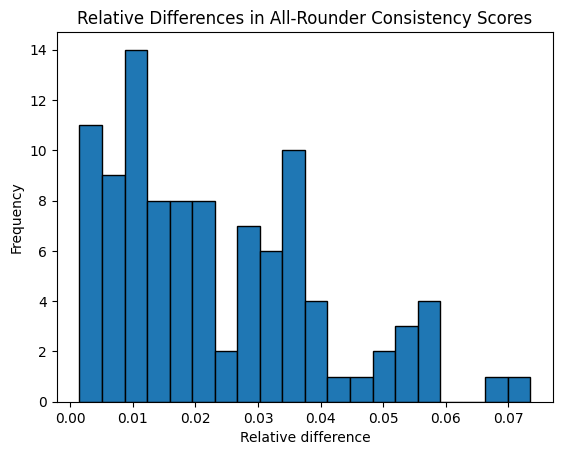

Mean correlation: 0.999898704225298
Mean relative difference: 0.02347470551643408


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the all-rounder derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

# Define a function to compute the composite consistency score for all-rounders
def compute_consistency_score(df, weights):
    # Ensure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Drop rows with missing values in the relevant columns
data_clean = calculations_with_data[hybrid_weights_boosted.index].dropna()

# Recompute base scores using the cleaned data
base_scores = np.dot(data_clean.values, hybrid_weights_boosted.values)


# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(data_clean, perturbed_weights)

    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = []
for scores in perturbed_scores_list:
    # Check if the standard deviation of either set is zero to avoid undefined correlations
    if np.std(base_scores) == 0 or np.std(scores) == 0:
         correlations.append(np.nan)
    else:
         correlations.append(np.corrcoef(base_scores, scores)[0, 1])

# Filter out non-finite (NaN or inf) values from the correlations list
valid_correlations = [corr for corr in correlations if np.isfinite(corr)]

# Compute the mean relative difference between perturbed scores and base scores
base_mean_abs = np.mean(np.abs(base_scores))
if base_mean_abs == 0:
    relative_differences = [np.nan for _ in perturbed_scores_list]
else:
    relative_differences = [
        np.mean(np.abs(scores - base_scores)) / base_mean_abs
        for scores in perturbed_scores_list
    ]

# Filter out non-finite values from the relative differences
valid_relative_differences = [rd for rd in relative_differences if np.isfinite(rd)]

# Plot the distribution of correlation coefficients (if there are valid values)
if valid_correlations:
    plt.hist(valid_correlations, bins=20, edgecolor='k')
    plt.title("Correlation between Base and Perturbed All-Rounder Consistency Scores")
    plt.xlabel("Correlation coefficient")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No valid correlation values to plot.")

# Plot the distribution of relative differences (if there are valid values)
if valid_relative_differences:
    plt.hist(valid_relative_differences, bins=20, edgecolor='k')
    plt.title("Relative Differences in All-Rounder Consistency Scores")
    plt.xlabel("Relative difference")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No valid relative differences to plot.")

# Print summary statistics using only the valid values
if valid_correlations:
    print("Mean correlation:", np.mean(valid_correlations))
else:
    print("Mean correlation: No valid correlation values.")

if valid_relative_differences:
    print("Mean relative difference:", np.mean(valid_relative_differences))
else:
    print("Mean relative difference: No valid relative differences.")

# FINAL CONSISTENCY SCORE CALCULATION

### Consistency Score(Batting) = (0.157209 × (Inns_per_Mat_Bat)) + (0.117595 × (NO_per_Inns)) + (0.190595 × (Runs_per_BF)) + (0.168621 × (Ave_Score_Bat)) + (0.136275 × (50s100s_per_Inns)) – (0.040415 × (Zeros_per_Inns))

### Consistency Score (Bowler) = (0.050418 × (Inns_per_Mat_bowl)) + (0.045406 × (Overs_per_Inns)) + (0.014101 × (Wkts_per_Overs)) + (0.016071 × (Ave_Score_Bowl)) + (0.019330 × (Econ_Rate)) + (0.007741 × (SR_per_100)) + (0.015065 × (4W5W_per_Inns)) + (0.017913 × (Mdns_per_Overs))


### Consistency Score(allrounder) = Consistency Score(Batting) + Consistency Score(Bowler)
